In [1]:
# Title: Indoor Positioning using Wi-Fi fingerprinting
# Last update: Oct 5,2020
# Project name: Evaluate Techniques for Wifi Locationing

#===============================================================================
# Project Notes
#===============================================================================

# Summarize project:

# The goal of this project is to evaluate multiple machine learning models to predict the 
# location of a person inside a building using Wi-Fi fingerprinting. 

# Summarize top model and/or filtered dataset

# Random Forest is the best algorithm to train each building and best dataset is the one where zero variance variables are removed.

# The top dataset and model for each building are Zero variance dataset and Random Forest

## Building 0- zv_wifib0 and zvRFfitb0 with accuracy of 78.01%
## Building 1- zv_wifib1 and zvRFfitb1 with accuracy of 88.43%
## Building 2- zv_wifib2 and zvRFfitb2 with accuracy of 82.28%



## Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import  mean,std
import random

## Display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

## Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix

## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Feature selection and cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Pipeline and PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import joblib

## Import Source data

In [3]:
wifi_data = pd.read_csv("trainingData.csv")
wifi_data.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Evaluate data

In [4]:
## Check the structure of data

wifi_data.shape

(19937, 529)

##### Source data has 19937 observations and 520 columns

In [5]:
## Check column names

wifi_data.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [6]:
wifi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [7]:
## Check for nulls
wifi_data.isnull().values.any()

False

##### There are no null values in the Source data

In [8]:
## Check the data type of columns

wifi_data.dtypes

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

In [9]:
wifi_data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


## Understand Source data

In [10]:
## Check unique values of Building, Floor and space id

print(sorted(wifi_data.BUILDINGID.unique()))
print(sorted(wifi_data.FLOOR.unique()))
print(sorted(wifi_data.SPACEID.unique()))
print(sorted(wifi_data.RELATIVEPOSITION.unique()))

[0, 1, 2]
[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 25, 26, 27, 28, 29, 30, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 253, 254]
[1, 2]


##### There are 3 buildings, 5 floors and 254 unique Space id's.

In [11]:
## Unique Location combinations
Loc_combos =pd.DataFrame(wifi_data.groupby(['BUILDINGID','FLOOR','SPACEID']).size().reset_index())
Loc_combos

,BUILDINGID,FLOOR,SPACEID,0
0,0,0,102,20
1,0,0,106,10
2,0,0,107,10
3,0,0,110,10
4,0,0,111,20
...,...,...,...,...
730,2,4,216,10
731,2,4,217,10
732,2,4,218,10
733,2,4,219,10


##### There are 735 unique combination of Building-Floor-Space id

In [12]:
Loc_combos.groupby(['BUILDINGID','FLOOR']).count()[['SPACEID']]

SPACEID
BUILDINGID FLOOR         
0          0           54
           1           66
           2           68
           3           68
1          0           49
           1           38
           2           45
           3           30
2          0           44
           1           60
           2           57
           3           91
           4           65

##### Number of locations in each building and floor

In [13]:
## Unique Location combinations
Building_loc =pd.DataFrame(Loc_combos.groupby(['BUILDINGID']).count()[['SPACEID']]).reset_index()
Building_loc

,BUILDINGID,SPACEID
0,0,256
1,1,162
2,2,317


## Exploratory data Analysis

### Visualize number of locations in each building

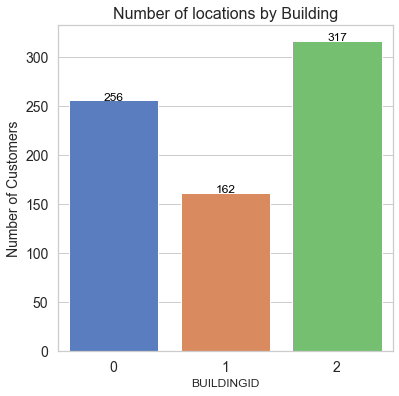

In [14]:
sns.set(style="whitegrid");

plt.figure(figsize=(6, 6));
# Plotting the graph
g=sns.barplot(x='BUILDINGID',y='SPACEID',data=Building_loc,palette='muted')

## Add data labels to the bar
for index, row in Building_loc.iterrows():
    g.text(row.name,row.SPACEID, round(row.SPACEID,2), color='black', ha="center");

# Set x,y labels, 

plt.title("Number of locations by Building", fontsize=16);
plt.ylabel('Number of Customers', fontsize=14);
plt.xticks(fontsize=14,rotation=0);
plt.yticks(fontsize=14);

### Visualize number of locations in each building and floor

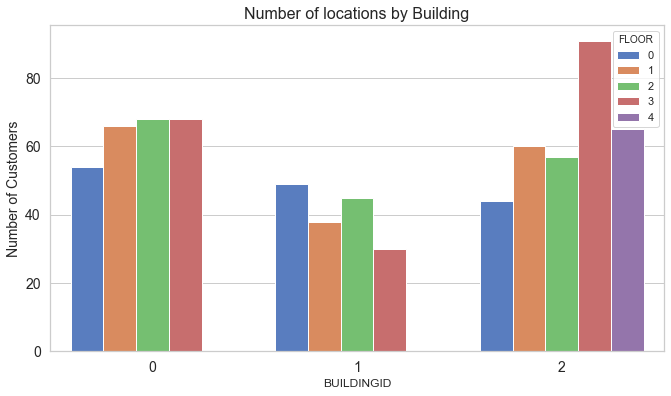

In [15]:
sns.set(style="whitegrid");

plt.figure(figsize=(11, 6));
# Plotting the graph
sns.countplot(x='BUILDINGID',hue='FLOOR',data=Loc_combos,palette='muted')

# Set x,y labels, 

plt.title("Number of locations by Building", fontsize=16);
plt.ylabel('Number of Customers', fontsize=14);
plt.xticks(fontsize=14,rotation=0);
plt.yticks(fontsize=14);

## Data Preprocessing

### Filter data

In [16]:
## Consider only the locations captured outside in the hallway

wifi_data = wifi_data[wifi_data['RELATIVEPOSITION']==2] # 16608 rows
wifi_data.shape

(16608, 529)

### Drop irrelavant columns

In [17]:
wifi_data.drop(['USERID','LONGITUDE','LATITUDE','PHONEID','TIMESTAMP'], axis=1, inplace=True) 

In [18]:
wifi_data.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'FLOOR',
       'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION'],
      dtype='object', length=524)

### Feature Engineering 
#### Create new column Location id as dependent variable

In [19]:
wifi_data['Location_id'] = wifi_data['BUILDINGID'].astype(str) + wifi_data['FLOOR'].astype(str)+ wifi_data['SPACEID'].astype(str)
wifi_data.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,Location_id
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,2,1,106,2,12106
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,2,1,106,2,12106
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,2,1,103,2,12103
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,2,1,102,2,12102
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,0,0,122,2,00122


#### Drop columns after creating Location_id

In [20]:
wifi_data.drop(['BUILDINGID','FLOOR','SPACEID','RELATIVEPOSITION'], axis=1, inplace=True) 

## Preparing data for Modeling

Modeling will be done by 2 ways. One is training the entire data and another is training individual buildings.

### Out of the box dataset

In [21]:
## Assign dataframe to new df oob_wifi
oob_wifi = wifi_data
oob_wifi.shape
oob_wifi.Location_id.nunique()

(16608, 521)

731

### Divide the dataset by buildings

In [22]:
## Assign each building data to different dataframe
oob_wifib0 = oob_wifi[oob_wifi.Location_id.str[0] == '0']
oob_wifib1= oob_wifi[oob_wifi.Location_id.str[0] == '1']
oob_wifib2= oob_wifi[oob_wifi.Location_id.str[0] == '2']

In [23]:
## Check the number of unique locations in each building
oob_wifib0.Location_id.nunique()
oob_wifib1.Location_id.nunique()
oob_wifib2.Location_id.nunique()

256

162

313

In [24]:
## Check the number of rows and columns in each building
oob_wifib0.shape
oob_wifib1.shape
oob_wifib2.shape

(5220, 521)

(3559, 521)

(7829, 521)

## Feature Selection

 Feature selection can to be done to reduce 520 features. Some of the feature selection methods are

1. Removing highly correlated features 
2. Recursive feature elimination 
3. Feature importance
4. Remove zero variance features

Let us remove the Zero variant features from out of the box dataset to create new datasets

In [25]:
## Set threshold to 0
selector = VarianceThreshold(threshold=0)

## Fit OOB dataset to get the Zero variant features
selector.fit(oob_wifi)
## Create new dataset after removing Zero variant features
zv_wifi= oob_wifi [oob_wifi.columns[selector.get_support()]]


## Create 3 datasets, one for each building after removing zero variant features
selector.fit(oob_wifib0)
zv_wifib0= oob_wifib0 [oob_wifib0.columns[selector.get_support()]]

selector.fit(oob_wifib1)
zv_wifib1= oob_wifib1 [oob_wifib1.columns[selector.get_support()]]

selector.fit(oob_wifib2)
zv_wifib2= oob_wifib2 [oob_wifib2.columns[selector.get_support()]]

VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

In [26]:
## Check the shape of new df's after applying feature selection
zv_wifi.shape ## 445 columns
zv_wifib0.shape ## 201 columns
zv_wifib1.shape ## 188 columns
zv_wifib2.shape ## 189 columns

(16608, 445)

(5220, 201)

(3559, 188)

(7829, 189)

## Summary of datasets

In [27]:
## Following datasets are created for each method

# Method 1: Entire data
# Dataset 1- oob_wifi- 16,608 rows and 521 columns with 731 unique location_id's
# Dataset 2- zv_wifi - 16,608 rows and 445 columns with 731 unique location_id's (Feature selection- Remove Zero variance)


# Method 2: Individual building

# Dataset 3- oob_wifib0 - Building 0- 5220 rows and 521 columns with 256 unique location_id's
# Dataset 4- oob_wifib1 - Building 1 -3559 rows and 521 columns with 162 unique location_id's
# Dataset 5- oob_wifib2 - Building 2 -7829 rows and 521 columns with 313 unique location_id's

# Dataset 6- zv_wifib0 - Building 0- 5220 rows and 201 columns with 256 unique location_id's (Feature selection- Remove Zero variance cols)
# Dataset 7- zv_wifib1 - Building 1 -3559 rows and 188 columns with 162 unique location_id's (Feature selection- Remove Zero variance)
# Dataset 8- zv_wifib2 - Building 2 -7829 rows and 189 columns with 313 unique location_id's (Feature selection- Remove Zero variance)

## Let us create training and test data for the above 8 datasets

## Train test split

#### Stratified Train test split for OOB datasets

In [28]:
## Train test split for all the OOB datasets

## Entire dataset
X_oob = oob_wifi.iloc[:,0:520]
y_oob = oob_wifi['Location_id']
oob_X_train, oob_X_test, oob_y_train, oob_y_test = train_test_split(X_oob, y_oob, test_size = .25, stratify=y_oob,random_state=123)

## Building 0
X_oob_b0 = oob_wifib0.iloc[:,0:520]
y_oob_b0 = oob_wifib0['Location_id']
oob_X_train_b0, oob_X_test_b0, oob_y_train_b0, oob_y_test_b0 = train_test_split(X_oob_b0, y_oob_b0, test_size = .25,stratify=y_oob_b0, random_state=123)

## Building 1
X_oob_b1 = oob_wifib1.iloc[:,0:520]
y_oob_b1 = oob_wifib1['Location_id']
oob_X_train_b1, oob_X_test_b1, oob_y_train_b1, oob_y_test_b1 = train_test_split(X_oob_b1, y_oob_b1, test_size = .25, stratify=y_oob_b1, random_state=123)

## Building 2
X_oob_b2 = oob_wifib2.iloc[:,0:520]
y_oob_b2 = oob_wifib2['Location_id']
oob_X_train_b2, oob_X_test_b2, oob_y_train_b2, oob_y_test_b2 = train_test_split(X_oob_b2, y_oob_b2, test_size = .25, stratify=y_oob_b2,random_state=123)


####  Stratified Train test split for ZV datasets

In [29]:
## Create train test split for all ZV datasets

## Entire dataset
X_zv= zv_wifi.iloc[:,0:444]
y_zv = zv_wifi['Location_id']
zv_X_train, zv_X_test, zv_y_train, zv_y_test= train_test_split(X_zv, y_zv, test_size = .25, stratify=y_zv,random_state=123)


## Building 0
X_zv_b0 = zv_wifib0.iloc[:,0:200]
y_zv_b0 = zv_wifib0['Location_id']
zv_X_train_b0, zv_X_test_b0, zv_y_train_b0, zv_y_test_b0 = train_test_split(X_zv_b0, y_zv_b0, test_size = .25,stratify=y_zv_b0, random_state=123)

## Building 1
X_zv_b1 = zv_wifib1.iloc[:,0:187]
y_zv_b1 = zv_wifib1['Location_id']
zv_X_train_b1, zv_X_test_b1, zv_y_train_b1, zv_y_test_b1 = train_test_split(X_zv_b1, y_zv_b1, test_size = .25,stratify=y_zv_b1, random_state=123)

## Building 2
X_zv_b2 = zv_wifib2.iloc[:,0:188]
y_zv_b2 = zv_wifib2['Location_id']
zv_X_train_b2, zv_X_test_b2, zv_y_train_b2, zv_y_test_b2 = train_test_split(X_zv_b2, y_zv_b2, test_size = .25,stratify=y_zv_b2, random_state=123)


In [35]:
## Check the number of classes in test data.

zv_y_test.nunique()
zv_y_test_b0.nunique()
zv_y_test_b1.nunique()
zv_y_test_b2.nunique()

## The test data has all the classes

730

256

162

312

 ### Multi Class classification problem
 
   This is a multi class classification problem. The entire dataset has 731 classes , Building 0 has 256 classes, Building 1 has 162 classes and Building 3 has 313 classes. Let's check the number of instances for each class in the entire dataset to check if it is balanced.

In [36]:
Class_balance = oob_wifi.groupby(['Location_id']).count()[['WAP001']].reset_index()
Class_balance.columns=['Location_id','Number of records']
Class_balance.sort_values(by='Number of records',ascending=False)


,Location_id,Number of records
310,11106,90
406,13202,84
407,13203,70
581,23107,69
449,20140,68
...,...,...
340,116,9
341,117,8
335,1127,6
320,1117,5


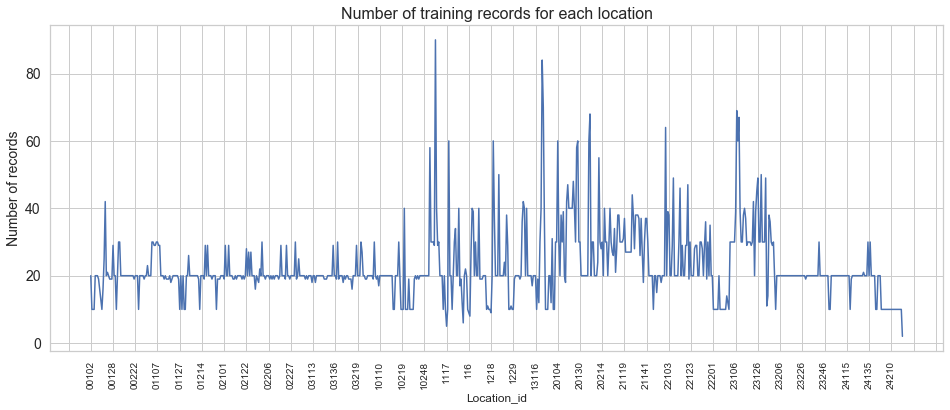

In [31]:
sns.set(style="whitegrid");
plt.figure(figsize=(16,6));
g=sns.lineplot(x='Location_id',y='Number of records',data=Class_balance)

# Set x,y labels, title

plt.title("Number of training records for each location", fontsize=16);
plt.ylabel('Number of records', fontsize=14);
g.xaxis.set_major_locator(plt.MaxNLocator(50));
plt.xticks(fontsize=10,rotation=90);
plt.yticks(fontsize=14);


## Modeling

There are 2 ways in which we can train the data. One is training the entire data using a single model and another is training each building separately. 2 datasets are created for each method (OOB, ZV). Each of the below dataset is going to be trained by 4 algorithms namely Random Forest, Decision tree, KNN and SVC. After training, we will choose the best model and best method.

Out of the box (OOB) dataset:

1. oob_wifi - Entire data
2. oob_wifib0- Building 0 OOB dataset
3. oob_wifib1- Building 1 OOB dataset
4. oob_wifib2- Building 2 OOB dataset

Zero Variance (ZV) dataset:

5. zv_wifi - Entire data after removing Zero variant columns
6. zv_wifib0 - Building 0 ZV dataset
7. zv_wifib1 - Building 1 ZV dataset
8. zv_wifib2 - Building 2 ZV dataset


### Entire OOB dataset

In [37]:
# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_oob,y_oob, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    

Random Forest Classifier 0.6643184007707129
Decision Tree Classifier 0.43454961464354525
K nearest neighbors Classifier 0.46110308285163776
Support Vector Classifier 0.5634633911368016


In [38]:
## Predict test data using the model with high training accuracy
oobRFfit =RandomForestClassifier(random_state=123).fit(oob_X_train,oob_y_train)
oobRFpred = oobRFfit.predict(oob_X_test)

print(classification_report(oob_y_test, oobRFpred))
print("Accuracy for Random Forest:",accuracy_score(oob_y_test, oobRFpred))

Report_oobRF = classification_report(oob_y_test, oobRFpred, output_dict=True)
Metrics_oobRF = pd.DataFrame(Report_oobRF).transpose().iloc[:-3,:]

              precision    recall  f1-score   support

       00102       0.80      0.80      0.80         5
       00106       1.00      1.00      1.00         3
       00107       1.00      0.67      0.80         3
       00110       1.00      1.00      1.00         2
       00111       0.75      0.60      0.67         5
       00112       0.83      1.00      0.91         5
       00113       0.80      0.80      0.80         5
       00114       1.00      0.60      0.75         5
       00115       1.00      1.00      1.00         4
       00116       0.75      1.00      0.86         3
       00117       1.00      0.67      0.80         3
       00118       1.00      1.00      1.00         4
       00119       1.00      0.83      0.91         6
       00120       0.83      1.00      0.91        10
       00121       0.71      1.00      0.83         5
       00122       1.00      1.00      1.00         5
       00123       0.50      0.60      0.55         5
       00125       1.00    

##### Accuracy of Random Forest for entire OOB dataset is  82.05%

## Building 0 OOB dataset

In [39]:
## Building 0

# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_oob_b0,y_oob_b0, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.6768199233716475
Decision Tree Classifier 0.45
K nearest neighbors Classifier 0.43429118773946357
Support Vector Classifier 0.5624521072796935


In [40]:
## Predict test data using the model with high training accuracy

oobRFfitb0 =RandomForestClassifier(random_state=123).fit(oob_X_train_b0,oob_y_train_b0)

oobRFpredb0 = oobRFfitb0.predict(oob_X_test_b0)

print(classification_report(oob_y_test_b0, oobRFpredb0))
print("Accuracy for Random Forest:",accuracy_score(oob_y_test_b0, oobRFpredb0))

Report_oobRF_b0 = classification_report(oob_y_test_b0, oobRFpredb0, output_dict=True)
Metrics_oobRF_b0 = pd.DataFrame(Report_oobRF_b0).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

       00102       1.00      0.80      0.89         5
       00106       0.75      1.00      0.86         3
       00107       1.00      0.50      0.67         2
       00110       0.50      0.50      0.50         2
       00111       1.00      0.80      0.89         5
       00112       0.56      1.00      0.71         5
       00113       1.00      1.00      1.00         5
       00114       0.80      0.80      0.80         5
       00115       0.80      1.00      0.89         4
       00116       0.75      1.00      0.86         3
       00117       0.00      0.00      0.00         2
       00118       0.80      1.00      0.89         4
       00119       1.00      0.83      0.91         6
       00120       0.89      0.73      0.80        11
       00121       0.67      0.40      0.50         5
       00122       0.80      0.80      0.80         5
       00123       0.60      0.60      0.60         5
       00125       1.00    

##### Accuracy of Random Forest for entire OOB dataset is  76.78%

## Building 1 OOB dataset

In [41]:
## Building 1

# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))
##algos_Class.append(('Gradient boosting Classifier',GradientBoostingClassifier()))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_oob_b1,y_oob_b1, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.7766342137253259
Decision Tree Classifier 0.5855693566191357
K nearest neighbors Classifier 0.5616890020377209
Support Vector Classifier 0.6420530072601203


In [42]:
oobRFfitb1 =RandomForestClassifier(random_state=123).fit(oob_X_train_b1,oob_y_train_b1)

oobRFpredb1 = oobRFfitb1.predict(oob_X_test_b1)

print(classification_report(oob_y_test_b1, oobRFpredb1))
print("Accuracy for Random Forest:",accuracy_score(oob_y_test_b1, oobRFpredb1))

Report_oobRF_b1 = classification_report(oob_y_test_b1, oobRFpredb1, output_dict=True)
Metrics_oobRF_b1 = pd.DataFrame(Report_oobRF_b1).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

         101       1.00      1.00      1.00         5
        1010       1.00      0.60      0.75         5
       10107       1.00      1.00      1.00         5
       10108       1.00      1.00      1.00         4
       10110       0.83      1.00      0.91         5
       10111       1.00      1.00      1.00         5
       10112       0.71      1.00      0.83         5
       10113       1.00      0.40      0.57         5
       10114       1.00      1.00      1.00         5
       10115       1.00      1.00      1.00         5
       10116       0.83      1.00      0.91         5
       10117       1.00      0.80      0.89         5
       10118       1.00      1.00      1.00         5
       10119       1.00      0.80      0.89         5
       10121       1.00      1.00      1.00         5
       10122       0.83      1.00      0.91         5
        1015       0.67      1.00      0.80         2
        1016       1.00    

##### Accuracy of Random Forest for entire OOB dataset is  89.21%

## Building 2 OOB dataset

In [43]:
## Building 2

# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))
#algos_Class.append(('Gradient boosting Classifier',GradientBoostingClassifier()))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_oob_b2,y_oob_b2, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.608122438929592
Decision Tree Classifier 0.376549687764184
K nearest neighbors Classifier 0.42725764582467507
Support Vector Classifier 0.5245884787260132


In [44]:
oobRFfitb2 =RandomForestClassifier(random_state=555).fit(oob_X_train_b2,oob_y_train_b2)

oobRFpredb2 = oobRFfitb2.predict(oob_X_test_b2)

print(classification_report(oob_y_test_b2, oobRFpredb2))
print("Accuracy for Random Forest:",accuracy_score(oob_y_test_b2, oobRFpredb2))

Report_oobRF_b2 = classification_report(oob_y_test_b2, oobRFpredb2, output_dict=True)
Metrics_oobRF_b2 = pd.DataFrame(Report_oobRF_b2).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

       20101       0.57      0.50      0.53         8
       20103       0.71      0.62      0.67         8
       20104       0.83      1.00      0.91        15
       20106       0.89      1.00      0.94         8
       20107       1.00      1.00      1.00         5
       20108       1.00      0.90      0.95        10
       20110       1.00      0.88      0.93         8
       20111       1.00      1.00      1.00        10
       20112       0.62      1.00      0.77         5
       20113       1.00      0.75      0.86         4
       20117       0.91      0.91      0.91        11
       20118       1.00      0.67      0.80        12
       20119       0.80      0.80      0.80        10
       20120       0.60      0.60      0.60        10
       20121       1.00      0.70      0.82        10
       20122       0.83      1.00      0.91        10
       20124       1.00      0.92      0.96        12
       20125       0.80    

##### Accuracy of Random Forest for entire OOB dataset is 80.49%

## Summary of OOB datasets

In [45]:
print("Random Forest for OOB entire dataset:",accuracy_score(oob_y_test, oobRFpred))
print("Random Forest for OOB Building 0:",accuracy_score(oob_y_test_b0, oobRFpredb0))
print("Random Forest for OOB Building 1:",accuracy_score(oob_y_test_b1, oobRFpredb1))
print("Random Forest for OOB Building 2:",accuracy_score(oob_y_test_b2, oobRFpredb2))

Random Forest for OOB entire dataset: 0.8205684007707129
Random Forest for OOB Building 0: 0.767816091954023
Random Forest for OOB Building 1: 0.8921348314606742
Random Forest for OOB Building 2: 0.804902962206333


In [46]:
## Number of classes in each recall range when trained by a single model for all buildings
Class_recall_oob_all=pd.DataFrame(pd.cut(Metrics_oobRF['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_oob_all.columns=['Total locations in each Recall range']
Class_recall_oob_all.sort_index()
print("Total locations:",Class_recall_oob_all['Total locations in each Recall range'].sum())

## Number of classes in each recall range when trained by one model for each building
Class_recall_oob=pd.DataFrame(pd.cut(Metrics_oobRF_b0['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_oob['Building 1']=pd.DataFrame(pd.cut(Metrics_oobRF_b1['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_oob['Building 2']=pd.DataFrame(pd.cut(Metrics_oobRF_b2['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_oob.columns=['Building0 Locations','Building1 Locations','Building2 Locations']

Class_recall_oob.index.name = 'Recall Range for those locations'
Class_recall_oob.reset_index(inplace=True)
Class_recall_oob['Total locations by Individual model']= Class_recall_oob["Building0 Locations"]+Class_recall_oob["Building1 Locations"]+Class_recall_oob["Building2 Locations"]
Class_recall_oob.sort_values(by='Recall Range for those locations')
print("Total locations:",Class_recall_oob['Total locations by Individual model'].sum())

,Total locations in each Recall range
"(-0.001, 0.1]",11
"(0.1, 0.25]",16
"(0.25, 0.5]",55
"(0.5, 0.75]",145
"(0.75, 0.99]",170
"(0.99, 1.0]",333


Total locations: 730


,Recall Range for those locations,Building0 Locations,Building1 Locations,Building2 Locations,Total locations by Individual model
5,"(-0.001, 0.1]",3,4,1,8
4,"(0.1, 0.25]",7,1,14,22
3,"(0.25, 0.5]",26,10,34,70
2,"(0.5, 0.75]",63,16,49,128
1,"(0.75, 0.99]",63,26,89,178
0,"(0.99, 1.0]",94,105,125,324


Total locations: 730


From the above results, it can be inferred that the number of locations correctly classified is better when trained by individual buildings.

## ZV dataset

### Entire ZV dataset

In [47]:
# Compare all the 4 algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000, class_weight='balanced')))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_zv,y_zv, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.6688945086705202
Decision Tree Classifier 0.4399084778420039
K nearest neighbors Classifier 0.46110308285163776
Support Vector Classifier 0.5611151252408478


In [48]:
## Predict test data using the algorithm witg high training accuracy


zvRFfit =RandomForestClassifier(random_state=123).fit(zv_X_train,zv_y_train)

zvRFpred = zvRFfit.predict(zv_X_test)

print(classification_report(zv_y_test, zvRFpred))
print("Accuracy for Random Forest:",accuracy_score(zv_y_test, zvRFpred))

Report_zvRF = classification_report(zv_y_test, zvRFpred, output_dict=True)
Metrics_zvRF = pd.DataFrame(Report_zvRF).transpose().iloc[:-3,:]

              precision    recall  f1-score   support

       00102       1.00      0.80      0.89         5
       00106       1.00      1.00      1.00         3
       00107       1.00      0.67      0.80         3
       00110       1.00      1.00      1.00         2
       00111       0.80      0.80      0.80         5
       00112       1.00      1.00      1.00         5
       00113       0.80      0.80      0.80         5
       00114       1.00      0.80      0.89         5
       00115       1.00      0.75      0.86         4
       00116       0.75      1.00      0.86         3
       00117       1.00      0.67      0.80         3
       00118       1.00      1.00      1.00         4
       00119       0.83      0.83      0.83         6
       00120       0.75      0.90      0.82        10
       00121       0.67      0.80      0.73         5
       00122       1.00      1.00      1.00         5
       00123       0.33      0.40      0.36         5
       00125       1.00    

#### Accuracy of Random Forest for entire ZV datset is 81.45%

###  Building 0 ZV dataset



In [49]:
## Building 0
# Compare all the four algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_zv_b0,y_zv_b0, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())


Random Forest Classifier 0.6800766283524905
Decision Tree Classifier 0.44674329501915705
K nearest neighbors Classifier 0.43429118773946357
Support Vector Classifier 0.5614942528735632


In [50]:
## Predict test data using the algorithm witg high training accuracy


zvRFfitb0 =RandomForestClassifier(random_state=123).fit(zv_X_train_b0,zv_y_train_b0)

zvRFpredb0 = zvRFfitb0.predict(zv_X_test_b0)

print(classification_report(zv_y_test_b0, zvRFpredb0))
print("Accuracy for Random Forest:",accuracy_score(zv_y_test_b0, zvRFpredb0))

Report_zvRF_b0 = classification_report(zv_y_test_b0, zvRFpredb0, output_dict=True)
Metrics_zvRF_b0 = pd.DataFrame(Report_zvRF_b0).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

       00102       1.00      0.60      0.75         5
       00106       1.00      1.00      1.00         3
       00107       1.00      1.00      1.00         2
       00110       1.00      0.50      0.67         2
       00111       1.00      0.20      0.33         5
       00112       0.50      1.00      0.67         5
       00113       1.00      1.00      1.00         5
       00114       0.80      0.80      0.80         5
       00115       0.80      1.00      0.89         4
       00116       0.75      1.00      0.86         3
       00117       0.00      0.00      0.00         2
       00118       0.80      1.00      0.89         4
       00119       1.00      1.00      1.00         6
       00120       1.00      0.82      0.90        11
       00121       0.50      0.40      0.44         5
       00122       0.71      1.00      0.83         5
       00123       0.60      0.60      0.60         5
       00125       1.00    

#### Accuracy of Random Forest for Building 0 ZV datset is 78%

### Building 1 ZV dataset

In [51]:
## Building 1


# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))
##algos_Class.append(('Gradient boosting Classifier',GradientBoostingClassifier()))

# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_zv_b1,y_zv_b1, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.7791632511283707
Decision Tree Classifier 0.5909054100705933
K nearest neighbors Classifier 0.5616890020377209
Support Vector Classifier 0.643457344011123


In [52]:
## Predict test data using the algorithm witg high training accuracy
zvRFfitb1 =RandomForestClassifier(random_state=999).fit(zv_X_train_b1,zv_y_train_b1)

zvRFpredb1 = zvRFfitb1.predict(zv_X_test_b1)

print(classification_report(zv_y_test_b1, zvRFpredb1))
print("Accuracy for Random Forest:",accuracy_score(zv_y_test_b1, zvRFpredb1))

Report_zvRF_b1 = classification_report(zv_y_test_b1, zvRFpredb1, output_dict=True)
Metrics_zvRF_b1 = pd.DataFrame(Report_zvRF_b1).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

         101       1.00      1.00      1.00         5
        1010       1.00      0.40      0.57         5
       10107       1.00      1.00      1.00         5
       10108       1.00      1.00      1.00         4
       10110       0.83      1.00      0.91         5
       10111       0.83      1.00      0.91         5
       10112       0.71      1.00      0.83         5
       10113       1.00      0.20      0.33         5
       10114       1.00      1.00      1.00         5
       10115       1.00      1.00      1.00         5
       10116       1.00      1.00      1.00         5
       10117       1.00      1.00      1.00         5
       10118       1.00      1.00      1.00         5
       10119       1.00      0.80      0.89         5
       10121       1.00      1.00      1.00         5
       10122       0.83      1.00      0.91         5
        1015       0.67      1.00      0.80         2
        1016       1.00    

#### Accuracy of Random Forest for Building 1 ZV datset is 88.42%

### Building 2 ZV dataset

In [53]:
## Building 2


# Compare all the three algorithms 
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K nearest neighbors Classifier',KNeighborsClassifier()))
algos_Class.append(('Support Vector Classifier',SVC(kernel='rbf',C=1000)))


# To build and assess both models, we create an empty list to store the results and another to hold the name
# of each algorithm so we can easily print out the results and keep them separated as follows
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_zv_b2,y_zv_b2, cv=3, n_jobs=7,scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print (names[i],results[i].mean())
    


Random Forest Classifier 0.6060785266835941
Decision Tree Classifier 0.36812042213636165
K nearest neighbors Classifier 0.42725764582467507
Support Vector Classifier 0.5253547622509175


In [54]:
## Predict test data using the algorithm witg high training accuracy
zvRFfitb2 =RandomForestClassifier(random_state=123).fit(zv_X_train_b2,zv_y_train_b2)

zvRFpredb2 = zvRFfitb2.predict(zv_X_test_b2)

print(classification_report(zv_y_test_b2, zvRFpredb2))
print("Accuracy for Random Forest:",accuracy_score(zv_y_test_b2, zvRFpredb2))

Report_zvRF_b2 = classification_report(zv_y_test_b2, zvRFpredb2, output_dict=True)
Metrics_zvRF_b2 = pd.DataFrame(Report_zvRF_b2).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

       20101       0.62      0.62      0.62         8
       20103       0.75      0.75      0.75         8
       20104       0.88      0.93      0.90        15
       20106       1.00      1.00      1.00         8
       20107       1.00      1.00      1.00         5
       20108       1.00      0.90      0.95        10
       20110       1.00      0.88      0.93         8
       20111       1.00      1.00      1.00        10
       20112       0.71      1.00      0.83         5
       20113       1.00      0.75      0.86         4
       20117       0.92      1.00      0.96        11
       20118       1.00      0.75      0.86        12
       20119       0.89      0.80      0.84        10
       20120       0.64      0.70      0.67        10
       20121       1.00      0.70      0.82        10
       20122       0.83      1.00      0.91        10
       20124       0.85      0.92      0.88        12
       20125       0.89    

#### Accuracy of Random Forest for Building 2 ZV datset is 82.27%

### Summary of ZV dataset

In [55]:
print("Random Forest for entire ZV dataset:",accuracy_score(zv_y_test, zvRFpred))
print("Random Forest for ZV Building 0:",accuracy_score(zv_y_test_b0, zvRFpredb0))
print("Random Forest for ZV Building 1:",accuracy_score(zv_y_test_b1, zvRFpredb1))
print("Random Forest for ZV Building 2:",accuracy_score(zv_y_test_b2, zvRFpredb2))

Random Forest for entire ZV dataset: 0.8145472061657033
Random Forest for ZV Building 0: 0.7800766283524905
Random Forest for ZV Building 1: 0.8842696629213483
Random Forest for ZV Building 2: 0.8227783452502554


#### Observation: ZV dataset accuracy is better than OOB dataset accuracy

### Comparing Recall of classes by Single and individual model

Once Random forest is chosen as the best algorithm, decision must be taken whether to use single model for training all data or separate model for each building. To decide, we must compare the Recall results of each model using Classification report.

In [56]:
## Number of classes in each recall range when trained by a single model for all buildings
Class_recall_zv_all=pd.DataFrame(pd.cut(Metrics_zvRF['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_zv_all.columns=['Total locations in each Recall range']
Class_recall_zv_all.sort_index()
print("Total locations:",Class_recall_zv_all['Total locations in each Recall range'].sum())

## Number of classes in each recall range when trained by one model for each building
Class_recall_zv=pd.DataFrame(pd.cut(Metrics_zvRF_b0['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_zv['Building 1']=pd.DataFrame(pd.cut(Metrics_zvRF_b1['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_zv['Building 2']=pd.DataFrame(pd.cut(Metrics_zvRF_b2['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_zv.columns=['Building0 Locations','Building1 Locations','Building2 Locations']

Class_recall_zv.index.name = 'Recall Range for those locations'
Class_recall_zv.reset_index(inplace=True)
Class_recall_zv['Total locations by Individual model']= Class_recall_zv["Building0 Locations"]+Class_recall_zv["Building1 Locations"]+Class_recall_zv["Building2 Locations"]
Class_recall_zv.sort_values(by='Recall Range for those locations')
print("Total locations:",Class_recall_zv['Total locations by Individual model'].sum())

,Total locations in each Recall range
"(-0.001, 0.1]",10
"(0.1, 0.25]",18
"(0.25, 0.5]",67
"(0.5, 0.75]",131
"(0.75, 0.99]",187
"(0.99, 1.0]",317


Total locations: 730


,Recall Range for those locations,Building0 Locations,Building1 Locations,Building2 Locations,Total locations by Individual model
5,"(-0.001, 0.1]",2,5,1,8
4,"(0.1, 0.25]",6,3,10,19
3,"(0.25, 0.5]",27,7,32,66
2,"(0.5, 0.75]",55,18,48,121
1,"(0.75, 0.99]",68,26,84,178
0,"(0.99, 1.0]",98,103,137,338


Total locations: 730


From the above results, number of locations correctly classified with more than 75% recall is more when buildings are trained individually.

## Hyperparameter tuning of Single model

In [57]:
# Setting the parameters

max_features =[32,100]
n_estimators=[200,300]
criterion=['gini','entropy']
# Assigning the classifier
forest = RandomForestClassifier()

# Assigning parameters
params = dict(max_features=max_features,
              n_estimators=n_estimators,
              criterion=criterion)

# Let us use RandomizedSearchCV for selecting hyperparameters
# GridSearchCV is time consuming than RandomizedSearchCV

clf = RandomizedSearchCV(forest, params, cv = 3, verbose = 1, 
                      n_jobs = 7)

# Fit the grid search
clf.fit(zv_X_train,zv_y_train)

print(clf.best_estimator_.get_params())


# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_zv, y_zv, cv=3, n_jobs=7)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  24 out of  24 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=7,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': [32, 100],
                                        'n_estimators': [200, 300]},
                   verbose=1)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 32, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

[0.5382948  0.73880058 0.75234827]

0.6764812138728323

0.09786895720002724


In [58]:
zvRFfit_tune =RandomForestClassifier(random_state=123,n_estimators=200,criterion='gini',max_features=32).fit(zv_X_train,zv_y_train)

zvRFpred_tune = zvRFfit_tune.predict(zv_X_test)

print(classification_report(zv_y_test, zvRFpred_tune))
print("Accuracy for Random Forest:",accuracy_score(zv_y_test, zvRFpred_tune))

Report_zvRF_tune = classification_report(zv_y_test, zvRFpred_tune, output_dict=True)
Metrics_zvRF_tune= pd.DataFrame(Report_zvRF_tune).transpose().iloc[:-3,:]


              precision    recall  f1-score   support

       00102       0.80      0.80      0.80         5
       00106       0.75      1.00      0.86         3
       00107       1.00      0.67      0.80         3
       00110       1.00      1.00      1.00         2
       00111       0.80      0.80      0.80         5
       00112       1.00      1.00      1.00         5
       00113       0.80      0.80      0.80         5
       00114       1.00      0.60      0.75         5
       00115       1.00      0.75      0.86         4
       00116       0.75      1.00      0.86         3
       00117       1.00      0.67      0.80         3
       00118       1.00      1.00      1.00         4
       00119       0.83      0.83      0.83         6
       00120       0.77      1.00      0.87        10
       00121       0.83      1.00      0.91         5
       00122       1.00      0.80      0.89         5
       00123       0.29      0.40      0.33         5
       00125       1.00    

In [63]:
## Number of classes in each recall range when trained by a single model for all buildings
Class_recall_zv_tune=pd.DataFrame(pd.cut(Metrics_zvRF_tune['recall'], [0,0.1, 0.25,0.5,0.75,0.99,1],include_lowest=True).value_counts())
Class_recall_zv_tune.columns=['Total locations in each Recall range']
Class_recall_zv_tune.sort_index()
print("Total locations:",Class_recall_zv_tune['Total locations in each Recall range'].sum())


,Total locations in each Recall range
"(-0.001, 0.1]",11
"(0.1, 0.25]",12
"(0.25, 0.5]",66
"(0.5, 0.75]",121
"(0.75, 0.99]",191
"(0.99, 1.0]",329


Total locations: 730


Even after hypertuning the single model, results from training by individual buildings is better as the number of locations classified 100% correctly is 338 in individual model and its 329 above.

## Dataset and Model Selection

### Dataset:

1. Building 0- zv_wifib0
2. Building 1- zv_wifib1
3. Building 2- zv_wifib2

### Models:

1. zvRFfitb0 with accuracy of 76.24% and recall of 78%
2. zvRFfitb1 with accuracy of 86.17% and recall of 84%
3. zvRFfitb2 with accuracy of 80.59% and recall of 81%

## Save top performing model

In [60]:
# Save to file in the current working directory
joblib_file_b0 = "joblib_Building 0_model.pkl"
joblib.dump(zvRFfitb0, joblib_file_b0)

joblib_file_b1 = "joblib_Building 1_model.pkl"
joblib.dump(zvRFfitb1, joblib_file_b1)

joblib_file_b2 = "joblib_Building 2_model.pkl"
joblib.dump(zvRFfitb2, joblib_file_b2)



['joblib_Building 0_model.pkl']

['joblib_Building 1_model.pkl']

['joblib_Building 2_model.pkl']

## Model test scores

In [62]:
# Load from file
joblib_model_b0 = joblib.load(joblib_file_b0)
joblib_model_b1 = joblib.load(joblib_file_b1)
joblib_model_b2= joblib.load(joblib_file_b2)

# Calculate the accuracy and predictions
score_b0 = joblib_model_b0.score(zv_X_test_b0, zv_y_test_b0)
print("Building 0 Test model score: {0:.2f} %".format(100 * score_b0))
Ypredict = joblib_model_b0.predict(zv_X_test_b0)


score_b1 = joblib_model_b1.score(zv_X_test_b1, zv_y_test_b1)
print("Building 1 Test model score: {0:.2f} %".format(100 * score_b1))
Ypredict = joblib_model_b1.predict(zv_X_test_b1)


score_b2 = joblib_model_b2.score(zv_X_test_b2, zv_y_test_b2)
print("Building 2 Test model score:: {0:.2f} %".format(100 * score_b2))
Ypredict = joblib_model_b2.predict(zv_X_test_b2)



Building 0 Test model score: 78.01 %
Building 1 Test model score: 88.43 %
Building 2 Test model score:: 82.28 %


## Conclusion

   After evaluating the findings, the recommendation is to train each building separately by Random Forest to get maximum number of locations correctly classified.